# **Title**

#### **Group members**
> **Chau**, Alyson (45652765)
<br>**Lee**, Jaye (83765560)
<br>**Nejati**,Koorosh (65809485)
<br>**Sun**, Oakley (48588198)

### **Introduction**

**ADD**: provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

This year, we are presented with a very interesting and fun opportunity, which includes working with data from a Minecraft server. The Pacific Laboratory for Artificial Intelligence, 
PLAI for short, led by Dr. Frank Wood has built a custom Minecraft server to collect real-time data on how individuals play and behave within the game world. However, running the Minecraft server involves real costs, such as software licensing, hardware, and human resources. To make the most of these investments, the team needs to focus on recruiting players who are most likely to generate a significant amount of usable data. 
This leads to our central research question: What skill set and age are most likely to contribute the most data?
We will use the players.csv file provided to us, which includes data of 197 participants, as well as important information on them for our question such as played hours, age, and skillset. 
Answering this question will help the research team better target their recruitment strategy, ensuring their resources are used effectively while maximizing the amount of high-quality data collected from participants.


**Basic information**

<u>Broad question 2</u>: What skill set and age are most likely to contribute the most data?

<u>Dataset used</u>: players.csv (197 rows, 7 cols)
>Column name - *(if numeric)*: max/min/mean
<br>Column name - *(if non-numeric)*: unique value (frequency in data)
<br>&ensp;&ensp;- Ratio of values in data

\+ Game experience - pro (14), veteran (48), regular (36), amateur (63), beginner (35)
<br>&ensp;&ensp;- 7%, 24%, 18%, 32%, 18%
<br>+ Subscribed to game-related newsletter? - yes (144), no (52)
<br>&ensp;&ensp; - 73%, 27%
<br>+ Email study participant used
<br>+ Hours spent on server - 223.1/0/5.84
<br>+ Name of study participant
<br>+ Gender of study participant - male (124), female (37), non-binary (15), prefer not to say (11), agender (2), two-spirited (6), other (1)
<br>&ensp;&ensp;- 63%, 19%, 8%, 6%, 1%, 3%, 0.5%
<br>+ Age of study participant - 50/8/25.5

### **Methods & Results** 
 <u>*all*</u> non-code text under \<temp> marks extra notes made during the coding process, should be deleted later. They are only for reference when writing the method summary.
\
**TODO**: note: all figures should have a figure number and a legend

To investigate which age group and skill set are most likely to contribute the most data, we conducted an exploratory analysis using the players.csv dataset. 
We began by loading the necessary libraries and reading in the dataset using the read_csv() function.



In [52]:
# loading libraries and data
library(tidyverse)
library(tidymodels)
player_url <- "https://raw.githubusercontent.com/Jaye136/project_data/refs/heads/main/players.csv"
players_raw <- read_csv(player_url)
head(players_raw)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


After the data was loaded, we performed data wrangling and cleaning by selecting only the relevant columns:experience,played_hours, and age. We then used the filter() function to remove any rows containing missing values to ensure the integrity of subsequent analyses.


In [53]:
# cleaning & wrangling
players_clean <- players_raw |>
select(experience, played_hours, Age) |>#Select columns used
filter(!is.na(experience), !is.na(played_hours), !is.na(Age)) #Remove NA values
head(players_clean)

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17


Next, we prepared the data for exploratory data analysis. The experience variable was initially as a character and not a categorical variable (factor) so we turned it into factor using as_factor() function and then we converted its categories, which includes Beginner, Amateur, Regular, Veteran, and Pro into a numerical scale from 1 to 5 using fct_recode() and as.numeric() functions. This allowed us to analyze the data using visualizations that need numerical axis. The played_hours variable, which contains a wide range of values, was grouped into six categories based on the hours: minimal (0–1), trial (1–2), session (2–5), casual (5–30), moderate (30–100), and long_term (100+). Since the average number of hours played was around 6 and the maximum was 223 hours, we used narrower intervals for values under 10 hours, where most players are concentrated, and broader intervals for values above 10 hours to capture long-term players. These categories were created to visualize broad time ranges and can be used for identifying trends within these time ranges.

In [54]:
# creating a relavent summary to perform exploratory analysis
# want to find is there a relationship between experience and age/noticeable trends/etc.
# we are making played_hours into categories to visualise broad time ranges with the colour argument of ggplot
# as average is ~6hrs, and max is 223hrs, we create narrower categories for [0, 10], and broader categories for 10+
# minimal: 0-1 hrs
# trial: 1-2 hrs
# session: 2-5 hrs
# casual: 5-30 hrs
# moderate: 30-100 hrs
# long_term: 100+ hrs


# reason we dont do barplot: hard to see axis values for age (if stacked, hard to see exact, if count/identity, inaccurate)
players_exploratory <- players_clean |>
mutate(experience = fct_recode(as_factor(experience),
                               "5" = "Pro",
                               "4" = "Veteran",
                               "3" = "Regular",
                               "2" = "Amateur",
                               "1" = "Beginner")) |>
mutate(experience = as.numeric(experience))# convert experience to numerical values (so can visualise)

players_exploratory$played_range_hrs <- cut(players_exploratory$played_hours, breaks = c(0, 1, 2, 5, 30, 100, Inf),# convert played_hours to factor datatype, so we can colour
                            right = FALSE,
                           labels = c("minimal", "trial", "session", "casual", "moderate", "long_term"))


players_exploratory <- players_exploratory |>
select(experience, Age, played_range_hrs)# select only needed
head(players_exploratory)

experience,Age,played_range_hrs
<dbl>,<dbl>,<fct>
1,9,moderate
2,17,session
2,17,minimal
3,21,minimal
4,21,minimal
3,17,minimal


For the visualization of the dataset, we used ggplot to create a scatterplot. Our plot shows player age against skill level with different colors representing different categories of played_hours. This plot (Figure 1) helped us visually assess whether certain skill levels and age groups were associated with higher contribution. Also in order to better the presentation quality, aesthetic qualities such as plot size, point size, transparency (alpha), and text size were adjusted and we made sure to use colorblind friendly pallete so it is accesible. We chose a scatterplot instead of a barplot because it would be hard to see the axis values for age ;In the bar plot if they were stacked, it would be hard to interpret exact information, and if count/identity type, it would be inaccurate.

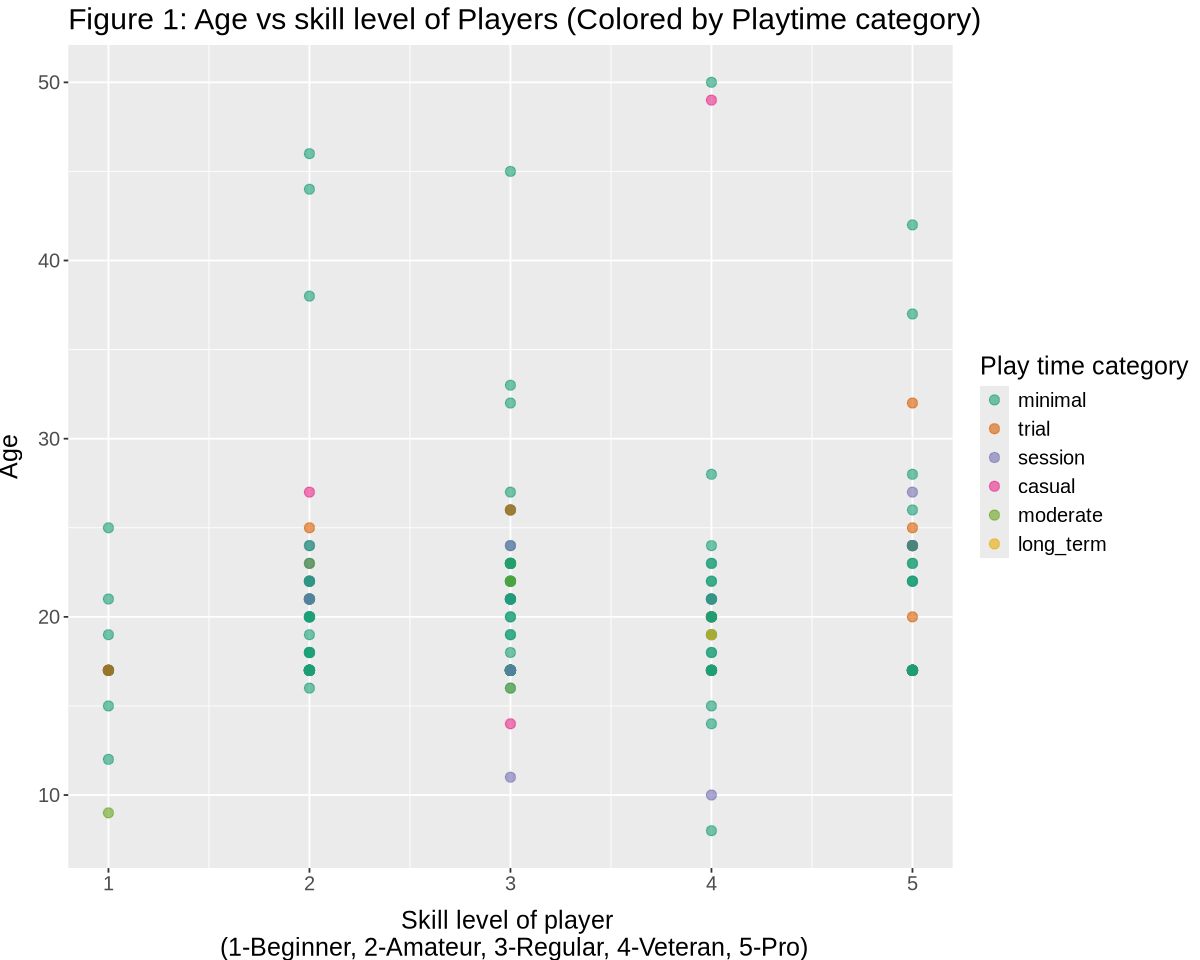

In [56]:
# visualising relevent parts of the data for exploratory analysis
options(repr.plot.height = 8, repr.plot.width = 10)
players_exploratory_vis <- players_exploratory |>
ggplot(aes(x = experience, y = Age, colour = played_range_hrs)) +
geom_point(size = 2.5, alpha = 0.6) +
scale_colour_brewer(palette = "Dark2") +
theme(text = element_text(size = 15), axis.title.x = element_text(vjust = -1), axis.title.y = element_text(vjust = 3), plot.title = element_text(vjust = 1)) +
labs(x = "Skill level of player \n (1-Beginner, 2-Amateur, 3-Regular, 4-Veteran, 5-Pro)",
    y = "Age", title = "Figure 1: Age vs skill level of Players (Colored by Playtime category)", colour = "Play time category")
players_exploratory_vis

note: If the colors of some points on Figure 1 look weird, it is because of the over laying of colors(so multiple colors are shown at the same time), we tried using shapes but it made it worse and we (and a TA) couldn't find a way to fix it.


For our actual predictive data analysis,we built a regression model to analyze which demographic was most likely to contribute the most playtime. We used the cleaned data and trained a K-nearest neighbors regression model with played_hours as the target and both Age and experience as predictors. We used cross-validation to select the best number of neighbors (k), which was found to be 2 neighbors.

In [41]:
# perform data analysis
# <temp>
# if there was relation found in previous part, WHAT demographic provides most data
# do with regression? use players_clean, NOT players_explore. predicting played_hours using age and subscribe
# create tibble of test values (EG. 15 yr old, regular), get model to predict played hrs? make list of demographics and test which one gives the highest played hours -> kind of like summary
# model learns from data, able to guess if given new observations, what demographic on average would give highest values

# choosing a k for the model

# for reproducibility
set.seed(2025)

players_analysis <- players_clean |>
mutate(experience = fct_recode(as_factor(experience),
                               "5" = "Pro",
                               "4" = "Veteran",
                               "3" = "Regular",
                               "2" = "Amateur",
                               "1" = "Beginner")) |>
mutate(experience = as.numeric(experience))

players_split <- initial_split(players_analysis, prop = 0.75, strata = played_hours)
plyr_train <- training(players_split)
plyr_test <- testing(players_split)

plyr_tune_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_mode("regression") |>
set_engine("kknn")

plyr_recipe <- plyr_train |>
recipe(played_hours ~ Age + experience) |>
step_scale(all_predictors()) |>
step_center(all_predictors())


plyr_vfold <- vfold_cv(plyr_train, v = 4, strata = played_hours)
plyr_ktest <- tibble(neighbors = seq(1, 5, 1))

plyr_k_fitflow <- workflow() |>
add_recipe(plyr_recipe) |>
add_model(plyr_tune_model) |>
tune_grid(resamples = plyr_vfold, grid = plyr_ktest) |>
collect_metrics() |> 
filter(.metric == "rmse") |>
slice_min(mean) |> 
pull(neighbors)#after running the code the best k is found to be k=2


Using the selected value of k(best k), we fit the final model and evaluated its performance by calculating the RMSE on the training set and the RMSPE on the testing set. These metrics helped us understand both the model’s accuracy on known data and its ability to predict new data.

In [42]:
# finding error
plyr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = plyr_k_fitflow) |>
set_mode("regression") |>
set_engine("kknn")

plyr_fitflow <- workflow() |>
add_recipe(plyr_recipe) |>
add_model(plyr_spec) |>
fit(plyr_train)

# RMSE
plyr_rmse <- plyr_fitflow |>
predict(plyr_train) |>
bind_cols(plyr_train) |>
metrics(truth = played_hours, estimate = .pred) |>
filter(.metric == "rmse") |>
pull(.estimate)

plyr_rmse

# RMSPE
plyr_rmspe <- plyr_fitflow |>
predict(plyr_test) |>
bind_cols(plyr_test) |>
metrics(truth = played_hours, estimate = .pred) |>
filter(.metric == "rmse") |>
pull(.estimate)

plyr_rmspe



[1] 30.05864

[1] 15.66515

In our results, the model achieved an RMSE of 30.06 on the training data and an RMSPE of 15.66 on the testing data. This indicates that while the model performs reasonably well on the training set, its predictions on new data are more accurate. The lower RMSPE suggests the model generalizes effectively to unseen player demographics which makes it reliable for estimating who contributes the most playtime.

We then created a tibble of different demographic combinations based on age(with increments of 10) and skill level to use as test cases in our model. The model predicted how much data each demographic would likely contribute.

In [58]:
# using the model to predict the playtime per demographic (based on age and experience)
player_demographics <- tibble(Age = c(10,10,10,10,10, 20,20,20,20,20, 30,30,30,30,30, 40,40,40,40,40, 50,50,50,50,50),
                              experience = c(1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5))

pred_demographic_playtime <- plyr_fitflow |>
predict(player_demographics) |>
bind_cols(player_demographics) |>
mutate(played_hours = .pred) |> select(-.pred)

# what demographic has the highest playtime/gives the most data?
most_play <- pred_demographic_playtime |>
slice_max(played_hours, n = 3)
most_play

# <pred>
# when grouped into age groups by 10 years, 10 year olds at an amateur level provide the most data
# the predicted played hours per demographic have an rmspe of 15.66 and an rmse of 30.06

Age,experience,played_hours
<dbl>,<dbl>,<dbl>
10,2,16.60
10,1,15.15
10,3,10.05


Finally we visualized the predicted playtime of each demographic using a grouped bar plot, which showed that 10-year-olds with amateur experience contributed the most data.

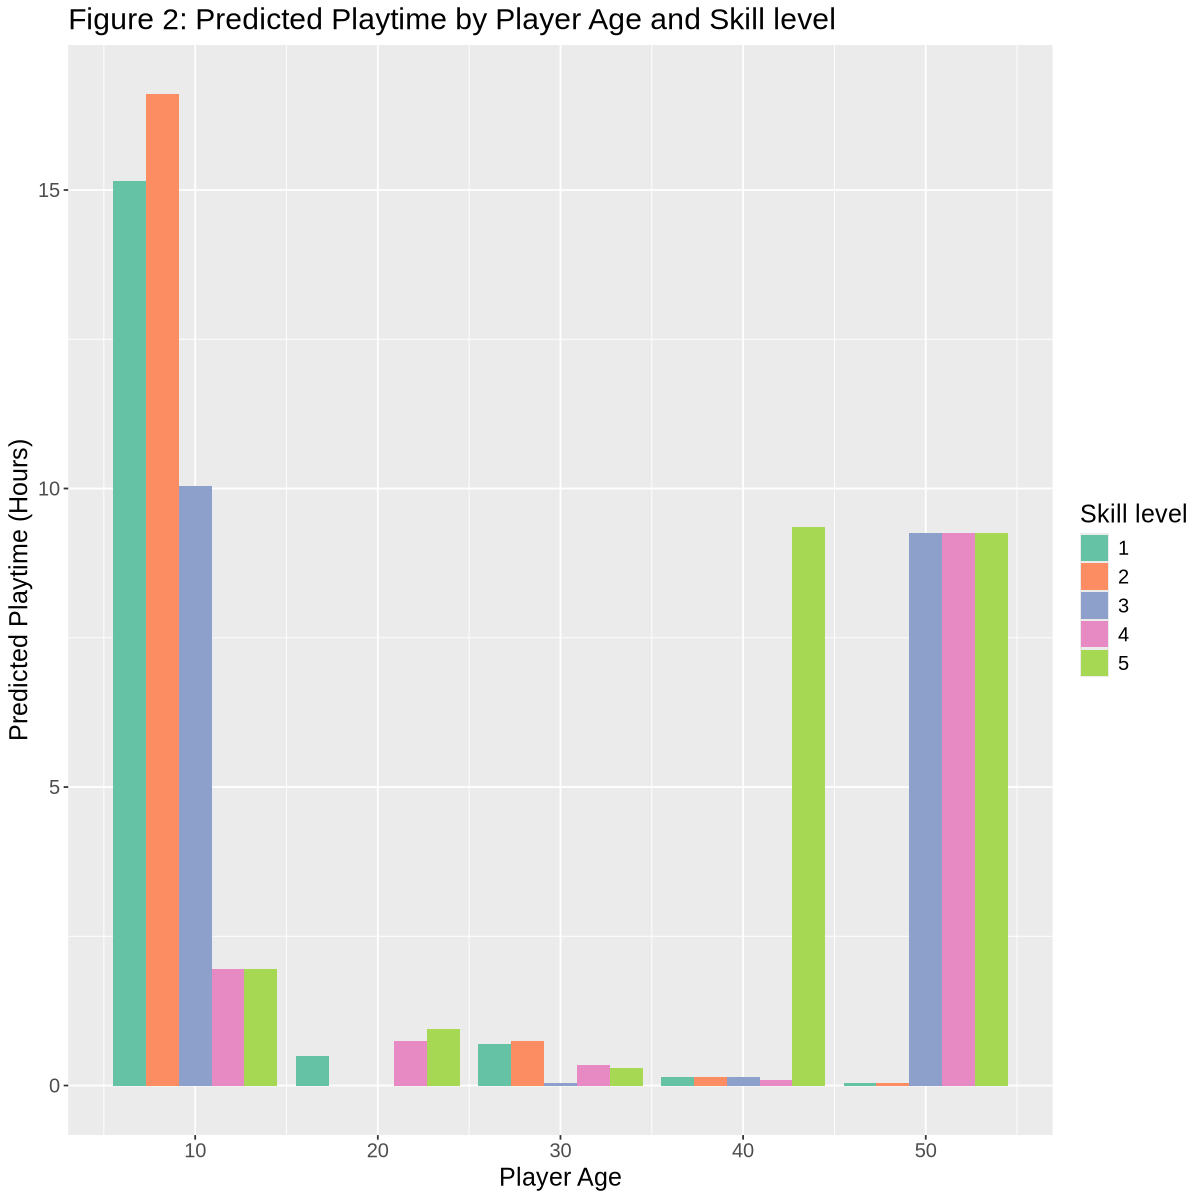

In [59]:
# visualise the data analysis
options(repr.plot.height = 10, repr.plot.width = 10)
player_demo_graph <- pred_demographic_playtime |>
mutate(experience = as.factor(experience)) |>
ggplot(aes(x = Age, y = played_hours, fill = experience)) + 
geom_bar(stat = "identity", position = "dodge") +
labs(title = "Figure 2: Predicted Playtime by Player Age and Skill level",
    x = "Player Age",
    y = "Predicted Playtime (Hours)",
    fill = "Skill level")+
scale_fill_brewer(palette = "Set2")+
theme(text=element_text(size=15))
player_demo_graph

note: In our visualizations, we aimed to have effective and clear plots with colorblind friendly colors and clear axis name and legend.

### **Discussion**

<u>What we found</u>: **ADD**
<br><u>What we expected?</u>: 
<br><u>Effects of findings</u>: 
<br><u>Future questions</u>: 

### **References**

Pacific Labratory for Artificial Intelligence (PLAI). (2024). *PLAICRAFT Player Data*, [Dataset]. UBC Department of Statistics. https://canvas.ubc.ca/courses/153254/files/37600949?wrap=1

Converting range of values to categories:
<br>**PROPERLY CITE** https://www.statology.org/cut-function-in-r/

### **Scratch work**

In [45]:
# This section includes nothing that needs to be marked. It is for the reproducibility of the data descriptions.

In [46]:
# information about players.csv
ncol(players_raw)
nrow(players_raw)

# information about game experience
filter(players_raw, experience == "Pro") |> nrow()
filter(players_raw, experience == "Veteran") |> nrow()
filter(players_raw, experience == "Regular") |> nrow()
filter(players_raw, experience == "Amateur") |> nrow()
filter(players_raw, experience == "Beginner") |> nrow()

# subscribed to newsletter?
filter(players_raw, subscribe == TRUE) |> nrow()
filter(players_raw, subscribe == FALSE) |> nrow()

# information about hours spent on server
slice_max(players_raw, played_hours, n = 1) |> distinct(played_hours) |> pull()
slice_min(players_raw, played_hours, n = 1) |> distinct(played_hours) |> pull()
summarise(players_raw, avg_play = mean(played_hours, na.rm = TRUE)) |> pull()

# information about player genders
filter(players_raw, gender == "Male") |> nrow()
filter(players_raw, gender == "Female") |> nrow()
filter(players_raw, gender == "Non-binary") |> nrow()
filter(players_raw, gender == "Prefer not to say") |> nrow()
filter(players_raw, gender == "Agender") |> nrow()
filter(players_raw, gender == "Two-Spirited") |> nrow()
filter(players_raw, gender == "Other") |> nrow()

# information about ages of participants
slice_max(players_raw, Age, n = 1) |> distinct(Age) |> pull()
slice_min(players_raw, Age, n = 1) |> distinct(Age) |> pull()
summarise(players_raw, avg_age = mean(Age, na.rm = TRUE)) |> pull()

[1] 7

[1] 196

[1] 14

[1] 48

[1] 36

[1] 63

[1] 35

[1] 144

[1] 52

[1] 223.1

[1] 0

[1] 5.845918

[1] 124

[1] 37

[1] 15

[1] 11

[1] 2

[1] 6

[1] 1

[1] 50

[1] 8

[1] 20.52062